# Skew-T Analysis
Classic skew-T/log-p plot using data from University of Wyoming.

This example uses example data from the University of Wyoming
sounding archive for 12 UTC 31 October 2016 for Minneapolis, MN (MPX)
and uses MetPy to plot the classic skew-T with Temperature, Dewpoint,
and wind barbs.

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

Set time using a datetime object and station as variables

In [2]:
dt = datetime(2016, 10, 26, 12)
station = 'MPX'

## Grad Remote Data

This requires an internet connection to access the sounding data
from a remote server at the University of Wyoming.

In [3]:
df = WyomingUpperAir.request_data(dt, station)

Isolate variables and attach units

In [4]:
p = df.pressure.values * units(df.units['pressure'])
T = df.temperature.values * units(df.units['temperature'])
Td = df.dewpoint.values * units(df.units['dewpoint'])
u = df.u_wind.values * units(df.units['u_wind'])
v = df.v_wind.values * units(df.units['v_wind'])

# Set index value for 100 hPa level
# This will help with plotting the final skew-T
# Defaults to last value in array if 100 hPa not in data
try:
    ip100 = list(p.m).index(100)+1
except:
    ip100 = -1

## Make Skew-T Plot
The code below makes a basic skew-T plot using the MetPy plot module
that contains a SkewT class.

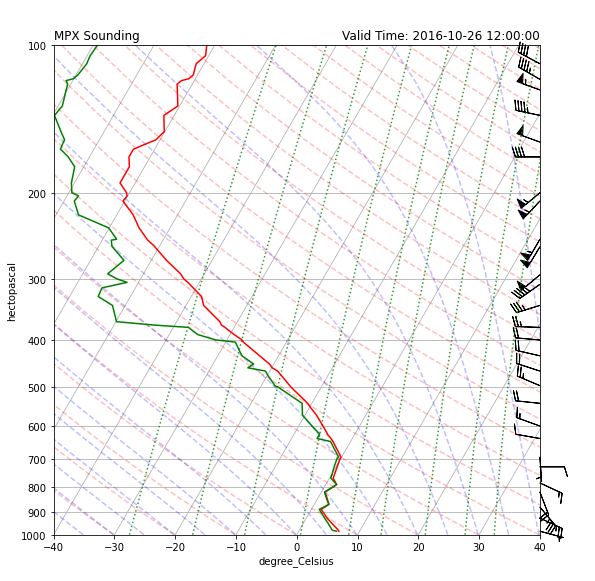

In [5]:
# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[:ip100:3], u[:ip100:3], v[:ip100:3])

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-40, 40)
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233,533,10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233,400,5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title(f'{station} Sounding', loc='left')
plt.title(f'Valid Time: {dt}', loc='right')

#plt.savefig(f'{station}_{dt:%Y%m%d%H}_SkewT_Analysis.png',
#            dpi=150, bbox_inches='tight')
plt.show()
plt.close()